# 필요한 라이브러리 설치

In [344]:
# ! pip install pandas
# ! pip install matplotlib
# ! pip install bs4
# ! pip install requests
# ! pip install selenium
# ! pip install numpy

# 필요한 라이브러리 import 

In [345]:
import pandas as pd  # 판다스 라이브러리를 pd라는 이름으로 선언
import warnings      # 데이터 프레임 수정 시 나오는 경고 (무시)
warnings.filterwarnings('ignore')

from matplotlib import font_manager, rc  # 그래프 그릴 때 필요한 모듈
font_path = "C:/Windows/Fonts/NGULIM.TTF" # 그래프에 한글 표시
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# **1. 주제: 쿠팡 닭가슴살 제품 관련 가설 검정**

## 데이터 불러오기

In [346]:
df=pd.read_csv("Coupang_df.csv")

In [347]:
df.head()   # 데이터 위쪽 5개 행 출력

,브랜드,제품명,검색 순위,쿠팡 판매가,쿠팡 판매가 단위별 가격,와우 할인가,와우 할인가 단위별 가격,상품평 수
0,NaN,국내산 닭가슴살 10kg. 1kg x 10 냉장,1,"55,000원",(100g당 550원),없음,NaN,117개
1,올품,"올품 IQF 닭가슴살 1kg x 5봉, 1kg, 5개",2,"38,600원",(100g당 772원),없음,NaN,952개
2,NaN,"한강식품 IQF 무항생제 닭가슴살 (냉동), 1kg, 5개",3,"40,160원",(100g당 803원),없음,NaN,"13,760개"
3,NaN,"브린 껍질없는 닭가슴살, 5kg, 1개",4,"30,290원",(100g당 606원),없음,NaN,937개
4,NaN,"사계림 국내산 냉장 생닭가슴살 2kg포장, 14kg(2kg X..., 7개",5,"80,840원",(100g당 577원),없음,NaN,54개


In [348]:
df.columns=["brand", "title", "rank", "origin_price", "origin_unit_price", "saled_price", "saled_unit_price", "review_counts"]  # 데이터프레임 열 이름 변경

In [349]:
df.head()

,brand,title,rank,origin_price,origin_unit_price,saled_price,saled_unit_price,review_counts
0,NaN,국내산 닭가슴살 10kg. 1kg x 10 냉장,1,"55,000원",(100g당 550원),없음,NaN,117개
1,올품,"올품 IQF 닭가슴살 1kg x 5봉, 1kg, 5개",2,"38,600원",(100g당 772원),없음,NaN,952개
2,NaN,"한강식품 IQF 무항생제 닭가슴살 (냉동), 1kg, 5개",3,"40,160원",(100g당 803원),없음,NaN,"13,760개"
3,NaN,"브린 껍질없는 닭가슴살, 5kg, 1개",4,"30,290원",(100g당 606원),없음,NaN,937개
4,NaN,"사계림 국내산 냉장 생닭가슴살 2kg포장, 14kg(2kg X..., 7개",5,"80,840원",(100g당 577원),없음,NaN,54개


---

# 2. 가설:
    
## 2_1 : *쿠팡 검색 랭킹(rank)이 높을 수록, 상품평 수(review_counts)가 많을 것이다.*

## 2_2 : *제품 무게가 무거울수록 (대용량 제품일수록), 100g당 가격(unit_price)이 저렴할 것이다.*

---

# 3. 분석할 데이터의 출처와 데이터 내용:

**데이터 출처** : 쿠팡
    
**데이터 내용** (닭가슴살 제품 정보) :
* 브랜드
* 제품명
* 검색 순위
* 쿠팡 판매가 (+ 단위별 가격)
* 와우 할인가 (+ 단위별 가격)
*  상품평 수

In [350]:
df.head()

,brand,title,rank,origin_price,origin_unit_price,saled_price,saled_unit_price,review_counts
0,NaN,국내산 닭가슴살 10kg. 1kg x 10 냉장,1,"55,000원",(100g당 550원),없음,NaN,117개
1,올품,"올품 IQF 닭가슴살 1kg x 5봉, 1kg, 5개",2,"38,600원",(100g당 772원),없음,NaN,952개
2,NaN,"한강식품 IQF 무항생제 닭가슴살 (냉동), 1kg, 5개",3,"40,160원",(100g당 803원),없음,NaN,"13,760개"
3,NaN,"브린 껍질없는 닭가슴살, 5kg, 1개",4,"30,290원",(100g당 606원),없음,NaN,937개
4,NaN,"사계림 국내산 냉장 생닭가슴살 2kg포장, 14kg(2kg X..., 7개",5,"80,840원",(100g당 577원),없음,NaN,54개


### 기본 전처리 (중복값 제거)

In [351]:
df

,brand,title,rank,origin_price,origin_unit_price,saled_price,saled_unit_price,review_counts
0,NaN,국내산 닭가슴살 10kg. 1kg x 10 냉장,1,"55,000원",(100g당 550원),없음,NaN,117개
1,올품,"올품 IQF 닭가슴살 1kg x 5봉, 1kg, 5개",2,"38,600원",(100g당 772원),없음,NaN,952개
2,NaN,"한강식품 IQF 무항생제 닭가슴살 (냉동), 1kg, 5개",3,"40,160원",(100g당 803원),없음,NaN,"13,760개"
3,NaN,"브린 껍질없는 닭가슴살, 5kg, 1개",4,"30,290원",(100g당 606원),없음,NaN,937개
4,NaN,"사계림 국내산 냉장 생닭가슴살 2kg포장, 14kg(2kg X..., 7개",5,"80,840원",(100g당 577원),없음,NaN,54개
...,...,...,...,...,...,...,...,...
211,미쳤닭,"미쳤닭 냉동 생닭가슴살 (200g포장), 200g, 5개",212,"14,900원","(100g당 1,490원)",없음,NaN,"1,313개"
212,NaN,"올계 유기농인증 닭가슴살 (냉동), 300g, 1개",213,"12,830원","(100g당 4,277원)",없음,NaN,385개
213,신선애,"신선애 IQF 한입 닭가슴살 1kg, 1kg, 1팩",214,"10,500원",NaN,없음,NaN,8개
214,NaN,"풀토래_냉장 닭안심 2kg_국내산, 2kg, 2개",215,"27,800원",(100g당 695원),없음,NaN,"2,866개"


In [352]:
# 'title', 'origin_price' 기준 중복된 제품이 있을 경우 하나만 남김 (앞의 값)
df.drop_duplicates(subset=['title', 'origin_price'], inplace=True)

In [353]:
df

,brand,title,rank,origin_price,origin_unit_price,saled_price,saled_unit_price,review_counts
0,NaN,국내산 닭가슴살 10kg. 1kg x 10 냉장,1,"55,000원",(100g당 550원),없음,NaN,117개
1,올품,"올품 IQF 닭가슴살 1kg x 5봉, 1kg, 5개",2,"38,600원",(100g당 772원),없음,NaN,952개
2,NaN,"한강식품 IQF 무항생제 닭가슴살 (냉동), 1kg, 5개",3,"40,160원",(100g당 803원),없음,NaN,"13,760개"
3,NaN,"브린 껍질없는 닭가슴살, 5kg, 1개",4,"30,290원",(100g당 606원),없음,NaN,937개
4,NaN,"사계림 국내산 냉장 생닭가슴살 2kg포장, 14kg(2kg X..., 7개",5,"80,840원",(100g당 577원),없음,NaN,54개
...,...,...,...,...,...,...,...,...
211,미쳤닭,"미쳤닭 냉동 생닭가슴살 (200g포장), 200g, 5개",212,"14,900원","(100g당 1,490원)",없음,NaN,"1,313개"
212,NaN,"올계 유기농인증 닭가슴살 (냉동), 300g, 1개",213,"12,830원","(100g당 4,277원)",없음,NaN,385개
213,신선애,"신선애 IQF 한입 닭가슴살 1kg, 1kg, 1팩",214,"10,500원",NaN,없음,NaN,8개
214,NaN,"풀토래_냉장 닭안심 2kg_국내산, 2kg, 2개",215,"27,800원",(100g당 695원),없음,NaN,"2,866개"


In [354]:
df.reset_index(drop=True, inplace=True)

In [355]:
df

,brand,title,rank,origin_price,origin_unit_price,saled_price,saled_unit_price,review_counts
0,NaN,국내산 닭가슴살 10kg. 1kg x 10 냉장,1,"55,000원",(100g당 550원),없음,NaN,117개
1,올품,"올품 IQF 닭가슴살 1kg x 5봉, 1kg, 5개",2,"38,600원",(100g당 772원),없음,NaN,952개
2,NaN,"한강식품 IQF 무항생제 닭가슴살 (냉동), 1kg, 5개",3,"40,160원",(100g당 803원),없음,NaN,"13,760개"
3,NaN,"브린 껍질없는 닭가슴살, 5kg, 1개",4,"30,290원",(100g당 606원),없음,NaN,937개
4,NaN,"사계림 국내산 냉장 생닭가슴살 2kg포장, 14kg(2kg X..., 7개",5,"80,840원",(100g당 577원),없음,NaN,54개
...,...,...,...,...,...,...,...,...
188,미쳤닭,"미쳤닭 냉동 생닭가슴살 (200g포장), 200g, 5개",212,"14,900원","(100g당 1,490원)",없음,NaN,"1,313개"
189,NaN,"올계 유기농인증 닭가슴살 (냉동), 300g, 1개",213,"12,830원","(100g당 4,277원)",없음,NaN,385개
190,신선애,"신선애 IQF 한입 닭가슴살 1kg, 1kg, 1팩",214,"10,500원",NaN,없음,NaN,8개
191,NaN,"풀토래_냉장 닭안심 2kg_국내산, 2kg, 2개",215,"27,800원",(100g당 695원),없음,NaN,"2,866개"


In [356]:
# df.dropna(inplace=True) --> X

---

# 4. 분석계획

`가설 검정을 위한 방법`

1. 그래프를 통한 시각적 자료 해석
2. 통계적 지표 : 평균, 중앙값, 분산...
3. 통계적 검정 방법 (T-test, Chi Square Test, ANOVA...) 이건 나중에...

`2_1번 가설` : 쿠팡 검색 랭킹이 높을 수록, 상품평 수가 많을 것이다.

--> 쿠팡 검색 랭킹과 상품평 수의 관계를 파악해야함

1) 시각화
2) 통계적 지표 (그룹간 비교 ex) 상위 30% 그룹, 하위 30% 그룹, 나머지

`2_2번 가설` : 제품 무게가 무거울수록 (대용량 제품일수록), 100g당 가격이 저렴할 것이다.
* 데이터 생성 필요
1) 시각화
2) 통계적 지표 (그룹간 비교 ex) 상위 30% 그룹, 하위 30% 그룹, 나머지

---

# 5. 분석결과


## 2_1번 가설 : 쿠팡 검색 랭킹이 높을 수록, 상품평 수가 많을 것이다.


In [357]:
df_1 = df[['rank', 'review_counts']]

In [358]:
df_1.head()

,rank,review_counts
0,1,117개
1,2,952개
2,3,"13,760개"
3,4,937개
4,5,54개


In [359]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           193 non-null    int64 
 1   review_counts  193 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.1+ KB


In [360]:
only_int_list=[]

for row in df_1['review_counts']:
    only_int=""
    for char in row:
        if(char.isdigit()):
            only_int+=char
    only_int_list.append(int(only_int))

df_1['review_counts'] = only_int_list

In [361]:
df_1.head()

,rank,review_counts
0,1,117
1,2,952
2,3,13760
3,4,937
4,5,54


In [362]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   rank           193 non-null    int64
 1   review_counts  193 non-null    int64
dtypes: int64(2)
memory usage: 3.1 KB


### `2_1 가설 시각화 및 결과 해석`

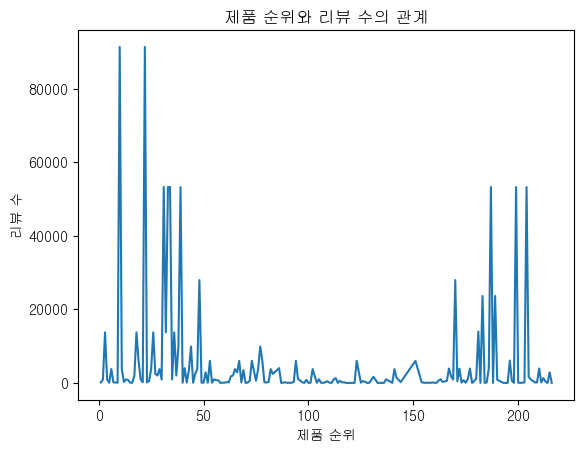

In [363]:
import matplotlib.pyplot as plt

plt.plot(df_1['rank'], df_1['review_counts'])
plt.xlabel('제품 순위')
plt.ylabel('리뷰 수')
plt.title("제품 순위와 리뷰 수의 관계")
plt.show()

 1위 ~ 50위까지에 리뷰수가 높은 제품이 다수 존재하나, 그 분산이 매우 크다.

중간 그룹은 리뷰수가 매우 적으며, 오히려 180 ~ 200의 후반부에 다시 리뷰수가 높은 제품이 다시 등장한다.

### `2_1 가설 통계 지표 및 결과 해석`

In [364]:
# 데이터를 3개의 그룹으로 분할
group_num=int(len(df_1)//3)
group_1=df_1.iloc[:group_num]
group_2=df_1.iloc[group_num:group_num*2]
group_3=df_1.iloc[group_num*2:]

# 예를들어 인덱스 기준 0부터 9까지 10개의 행이 있으면
# group_num = int(10//3) = 3
# group_1 = 0, 1, 2 ( :3)
# group_2 = 3, 4, 5 (3:6)
# group_3 = 6, 7, 8, 9 (6:)

In [365]:
group_1.describe()

,rank,review_counts
count,64.000000,64.00000
mean,32.500000,9062.59375
std,18.618987,19902.19527
min,1.000000,3.00000
25%,16.750000,125.25000
50%,32.500000,952.00000
75%,48.250000,4514.25000
max,64.000000,91399.00000


In [366]:
group_2.describe()

,rank,review_counts
count,64.000000,64.000000
mean,101.546875,1324.734375
std,22.191754,2147.523559
min,65.000000,0.000000
25%,81.750000,19.500000
50%,101.500000,178.000000
75%,118.750000,1402.000000
max,141.000000,9899.000000


In [367]:
group_3.describe()

,rank,review_counts
count,65.000000,65.000000
mean,182.846154,4661.507692
std,19.658197,12106.116756
min,142.000000,0.000000
25%,167.000000,50.000000
50%,183.000000,397.000000
75%,199.000000,1669.000000
max,216.000000,53287.000000


`group_1 (상위 30%)`

제품 별 평균 리뷰 수 : 9062개

표준 편차 : 19902개

`group_2 (중위 30%)`

제품 별 평균 리뷰 수 : 1324개

표준 편차 : 2147개

`group_3 (하위 30%)`

제품 별 평균 리뷰 수 : 4661개

표준 편차 : 12106개



### `그룹별 통계 지표 해석`
시각화 결과와 마찬가지로, 평균 리뷰 수의 경우에는 상위, 하위, 중위 그룹 순서대로 높지만, 각 그룹마다 표준편차가 매우 크다.

---

## 가설 1 최종 결론

200개 가량의 제품을 분석한 결과, **평균적인 리뷰수의 경우 검색순위 상위 그룹이 비교불가능할 정도로 높지만, 그 분산 (표준편차)이 매우 크다.**

따라서 "검색 랭킹이 높을 수록 리뷰수가 많다"는 가설을 체택할 수 있을 정도의 경향이 있다고 보기는 어렵다.

하지만, "검색 랭킹이 높은 그룹내의 소수의 제품이 리뷰수의 다수를 차지한다."는 현상과, "50위를 넘어가는 순간 제품 별 리뷰수가 확연히 떨어진다."는 유의미한 현상을 발견했다.

이는 곧 **"다수의 사람들이 50위 너머를 검색하기 전에 이미 앞에서 구매를 결정하기 때문에 그 뒤로는 리뷰가 적게 생기는 것일 수 있다"** 는 시사점을 제시한다.

또는 쿠팡의 추천 시스템이 리뷰수보다는 다른 요인 (가격 등)을 중요시 하기 때문일 수 있다.

---

In [368]:
df

,brand,title,rank,origin_price,origin_unit_price,saled_price,saled_unit_price,review_counts
0,NaN,국내산 닭가슴살 10kg. 1kg x 10 냉장,1,"55,000원",(100g당 550원),없음,NaN,117개
1,올품,"올품 IQF 닭가슴살 1kg x 5봉, 1kg, 5개",2,"38,600원",(100g당 772원),없음,NaN,952개
2,NaN,"한강식품 IQF 무항생제 닭가슴살 (냉동), 1kg, 5개",3,"40,160원",(100g당 803원),없음,NaN,"13,760개"
3,NaN,"브린 껍질없는 닭가슴살, 5kg, 1개",4,"30,290원",(100g당 606원),없음,NaN,937개
4,NaN,"사계림 국내산 냉장 생닭가슴살 2kg포장, 14kg(2kg X..., 7개",5,"80,840원",(100g당 577원),없음,NaN,54개
...,...,...,...,...,...,...,...,...
188,미쳤닭,"미쳤닭 냉동 생닭가슴살 (200g포장), 200g, 5개",212,"14,900원","(100g당 1,490원)",없음,NaN,"1,313개"
189,NaN,"올계 유기농인증 닭가슴살 (냉동), 300g, 1개",213,"12,830원","(100g당 4,277원)",없음,NaN,385개
190,신선애,"신선애 IQF 한입 닭가슴살 1kg, 1kg, 1팩",214,"10,500원",NaN,없음,NaN,8개
191,NaN,"풀토래_냉장 닭안심 2kg_국내산, 2kg, 2개",215,"27,800원",(100g당 695원),없음,NaN,"2,866개"


## 2_2번 가설 : 제품의 총중량이 무거울수록 (대용량 제품일수록), 100g당 가격이 저렴할 것이다.

단위 : 단위별 가격 = 총 중량 : 총 가격

In [384]:
df_2 = df[["title", "origin_price", "origin_unit_price"]]

In [385]:
df_2.head()

,title,origin_price,origin_unit_price
0,국내산 닭가슴살 10kg. 1kg x 10 냉장,"55,000원",(100g당 550원)
1,"올품 IQF 닭가슴살 1kg x 5봉, 1kg, 5개","38,600원",(100g당 772원)
2,"한강식품 IQF 무항생제 닭가슴살 (냉동), 1kg, 5개","40,160원",(100g당 803원)
3,"브린 껍질없는 닭가슴살, 5kg, 1개","30,290원",(100g당 606원)
4,"사계림 국내산 냉장 생닭가슴살 2kg포장, 14kg(2kg X..., 7개","80,840원",(100g당 577원)


In [386]:
# 단위별 가격이 없는 행은 제거
df_2.dropna(subset=["origin_unit_price"], inplace=True)
df_2.reset_index(drop=True, inplace=True)

# (100g당 550원) --> 100g('unit') 과 550('unit_price')으로 분리
only_unit_list=[]
only_unit_price_list=[]
for row in df_2['origin_unit_price']:
    only_unit=row.split("당")[0][1:-1]
    only_unit_price=row.split("당")[1][1:-2].replace(",","")
    only_unit=int(only_unit)
    only_unit_price=int(only_unit_price)
    only_unit_list.append(only_unit)
    only_unit_price_list.append(only_unit_price)

# 원본 프레임 수정
df_2['unit'] = only_unit_list
df_2['unit_price'] = only_unit_price_list

# 100g 당 가격으로 변환
df_2['unit_price'] = (df_2['unit_price'] / df_2['unit'] * 100)
df_2['unit']=100

In [388]:
df_2.head()

,title,origin_price,origin_unit_price,unit,unit_price
0,국내산 닭가슴살 10kg. 1kg x 10 냉장,"55,000원",(100g당 550원),100,550.0
1,"올품 IQF 닭가슴살 1kg x 5봉, 1kg, 5개","38,600원",(100g당 772원),100,772.0
2,"한강식품 IQF 무항생제 닭가슴살 (냉동), 1kg, 5개","40,160원",(100g당 803원),100,803.0
3,"브린 껍질없는 닭가슴살, 5kg, 1개","30,290원",(100g당 606원),100,606.0
4,"사계림 국내산 냉장 생닭가슴살 2kg포장, 14kg(2kg X..., 7개","80,840원",(100g당 577원),100,577.0


In [389]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              139 non-null    object 
 1   origin_price       139 non-null    object 
 2   origin_unit_price  139 non-null    object 
 3   unit               139 non-null    int64  
 4   unit_price         139 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 5.6+ KB


In [390]:
only_int_list=[]
for row in df_2['origin_price']:
    only_int=""
    for char in row:
        if(char.isdigit()):
            only_int+=char
    only_int_list.append(int(only_int))

df_2['origin_price']=only_int_list

In [391]:
df_2.head()

,title,origin_price,origin_unit_price,unit,unit_price
0,국내산 닭가슴살 10kg. 1kg x 10 냉장,55000,(100g당 550원),100,550.0
1,"올품 IQF 닭가슴살 1kg x 5봉, 1kg, 5개",38600,(100g당 772원),100,772.0
2,"한강식품 IQF 무항생제 닭가슴살 (냉동), 1kg, 5개",40160,(100g당 803원),100,803.0
3,"브린 껍질없는 닭가슴살, 5kg, 1개",30290,(100g당 606원),100,606.0
4,"사계림 국내산 냉장 생닭가슴살 2kg포장, 14kg(2kg X..., 7개",80840,(100g당 577원),100,577.0


### 제품 총 중량 계산 (단위는 kg)

단위 : 단위별 가격 = 총 중량 : 총 가격

unit : unit_price = origin_weight : origin_price

origin_weight = unit * origin_price / unit_price (g)

origin_weight = unit * origin_price / unit_price / 1000 (kg)

In [392]:
df_2['origin_weight'] = round((df_2['unit'] * df_2['origin_price']) / df_2['unit_price'] / 1000).astype(int)

In [394]:
df_2[["title", "origin_weight", "origin_unit_price","unit_price"]].head()

,title,origin_weight,origin_unit_price,unit_price
0,국내산 닭가슴살 10kg. 1kg x 10 냉장,10,(100g당 550원),550.0
1,"올품 IQF 닭가슴살 1kg x 5봉, 1kg, 5개",5,(100g당 772원),772.0
2,"한강식품 IQF 무항생제 닭가슴살 (냉동), 1kg, 5개",5,(100g당 803원),803.0
3,"브린 껍질없는 닭가슴살, 5kg, 1개",5,(100g당 606원),606.0
4,"사계림 국내산 냉장 생닭가슴살 2kg포장, 14kg(2kg X..., 7개",14,(100g당 577원),577.0


### `2_2 가설 시각화 및 결과 해석`

In [395]:
df_2=df_2[['origin_weight', 'unit_price']]

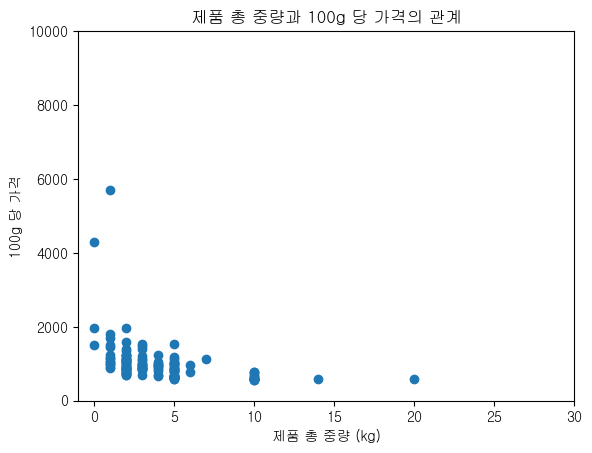

In [400]:
import matplotlib.pyplot as plt

plt.scatter(df_2['origin_weight'], df_2['unit_price'])
plt.ylim([0, 10000])
plt.xlim([-1, 30])
plt.xlabel('제품 총 중량 (kg)')
plt.ylabel('100g 당 가격')
plt.title('제품 총 중량과 100g 당 가격의 관계')
plt.show()

미약하지만, 제품 총 중량이 높을 수록, 100g 당 가격이 낮은 경향이 있다.

### `2_2 가설 통계 지표 및 결과 해석`

In [401]:
# 총 중량 기준으로 오름차순 정렬
df_2=df_2.sort_values(by="origin_weight")
# 전체 데이터를 3등분
group_num=int(len(df_2)//3)
group_1=df_2.iloc[:group_num]
group_2=df_2.iloc[group_num:group_num*2]
group_3=df_2.iloc[group_num*2:]

In [402]:
df_2

,origin_weight,unit_price
112,0,27900.0
136,0,4277.0
29,0,1508.0
123,0,1975.0
27,1,880.0
...,...,...
126,10,590.0
0,10,550.0
4,14,577.0
104,20,574.0


In [403]:
group_1.describe()

,origin_weight,unit_price
count,46.000000,46.000000
mean,1.521739,1871.130435
std,0.657914,4017.923148
min,0.000000,695.000000
25%,1.000000,895.750000
50%,2.000000,1086.000000
75%,2.000000,1354.500000
max,2.000000,27900.000000


In [404]:
group_2.describe()

,origin_weight,unit_price
count,46.000000,46.000000
mean,3.347826,962.282609
std,0.971079,215.878326
min,2.000000,600.000000
25%,3.000000,851.000000
50%,3.000000,919.000000
75%,4.000000,1044.750000
max,5.000000,1523.000000


In [405]:
group_3.describe()

,origin_weight,unit_price
count,47.000000,47.000000
mean,8.255319,733.404255
std,8.326146,224.234220
min,5.000000,73.000000
25%,5.000000,590.000000
50%,5.000000,655.000000
75%,10.000000,826.500000
max,60.000000,1538.000000


`group_1 (무게 기준 하위 30%)`

제품 별 평균 총 중량 : 1.52 kg

제품 별 평균 단위별 가격 : 1871 원

`group_2 (무게 기준 중위 30%)`

제품 별 평균 총 중량 : 3.34 kg

제품 별 평균 단위별 가격 : 962 원

`group_3 (무게 기준 상위 30%)`

제품 별 평균 총 중량 : 8.25 kg

제품 별 평균 단위별 가격 : 733 원

### `그룹별 통계 지표 해석`
그룹간 평균 총 중량과 단위별 가격을 확인했을 때, 확실히 총중량이 높을수록 단위별 가격이 낮다는 것을 확인할 수 있다.

---

## 가설 2 최종 결론

200개 가량의 제품을 분석한 결과, **제품의 총 중량이 높을수록 단위별 가격이 낮아진다는 현상을 발견할 수 있었다.**

심지어 총중량이 가장 낮은 그룹 1의 평균 단위 가격은 다음으로 낮은 그룹 2보다 약 2배가량 비싸다. (실제로는 제품의 총중량이 높은 경우에는 생닭가슴살인 경우가 많았던것이 이유임)

이는 제조업체에서 대량 생산 시 생기는 생산 비용 절감을 판매 단가를 낮추는데에 사용함으로써 제품의 세일즈 가치를 높이고 있다는 현상을 시사한다.

---

--> 이후 TODO : 그럼 제품의 단위별 가격이 낮을수록 판매량이 높은가?

만약 높다고 나오면?

--> 규모의 경제 현상 (제품이 많이 팔릴수록 제품 단가가 낮아진다)을 데이터로 확인할 수 있었다.